In [165]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model
import math
import sklearn.dummy

In [111]:
data = pd.read_csv('data/DATA_COURSE_DS.csv') #201911
data.sample(5)

,GENDER,AGE,SERVICE,SESSION
366213,Male,28,Google,32
40647,Male,40,Google,1323
64543,Male,29,Google,496
84321,Female,42,Tik Tok,1634
316662,Male,70,Facebook,92


In [93]:
data.shape

(394314, 4)

In [102]:
data_group = data.groupby(['SERVICE']).agg({'AGE':'mean', 'SESSION': 'sum'}).sort_values(by='SESSION', ascending=False)
data_group

,AGE,SESSION
SERVICE,,
Facebook,37.179300,147860312
Google,40.210264,106075295
Tik Tok,36.108807,30658540
WeChat,25.470243,16931824
LINE,42.144873,6195707
...,...,...
Wattpad,74.000000,1
RTCP,23.000000,1
OneDrive,40.000000,1


In [99]:
data_top_20 = data_group.nlargest(20, "SESSION").reset_index()
data_top_20

,SERVICE,AGE,SESSION
0,Facebook,37.179300,147860312
1,Google,40.210264,106075295
2,Tik Tok,36.108807,30658540
3,WeChat,25.470243,16931824
4,LINE,42.144873,6195707
5,QQ,37.726458,5750901
6,Instagram,35.935509,5662849
7,YouTube,39.825651,4262572
8,Twitter,35.992966,2392350
9,TrueID Streaming Live,37.159032,2085827


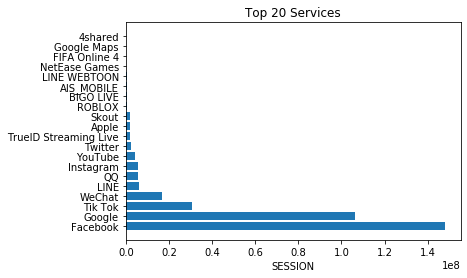

In [100]:
labels = data_top_20.SERVICE
y_pos = np.arange(len(labels))
value = data_top_20.SESSION

plt.barh(y_pos, value, align='center', alpha=1)
plt.yticks(y_pos, labels)
plt.xlabel('SESSION')
plt.title('Top 20 Services')

plt.show()

In [134]:
data_group_2 = data.groupby(['SERVICE','GENDER']).agg({'AGE':'mean', 'SESSION': 'sum'}).sort_values(by='SESSION', ascending=False)
data_group_2 = data_group_2.reset_index()

In [159]:
df_facebook = data_group_2[data_group_2.SERVICE == 'Facebook']
df_google = data_group_2[data_group_2.SERVICE == 'Google']
df_tiktok = data_group_2[data_group_2.SERVICE == 'Tik Tok']
df_wechat = data_group_2[data_group_2.SERVICE == 'WeChat']
df_line = data_group_2[data_group_2.SERVICE == 'LINE']
df_twitter = data_group_2[data_group_2.SERVICE == 'Twitter']

In [151]:
df_facebook

,SERVICE,GENDER,AGE,SESSION
0,Facebook,Male,36.936552,98505604
2,Facebook,Female,37.690066,49354708


C:\Users\Anuwat\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


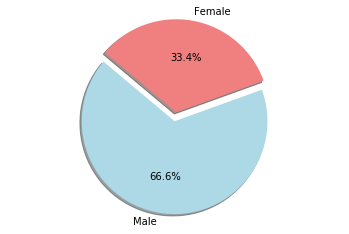

In [150]:
labels = df_facebook.GENDER
sizes = [df_facebook.SESSION]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [160]:
df_twitter

,SERVICE,GENDER,AGE,SESSION
15,Twitter,Female,34.686475,1471556
20,Twitter,Male,37.539208,920794


C:\Users\Anuwat\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


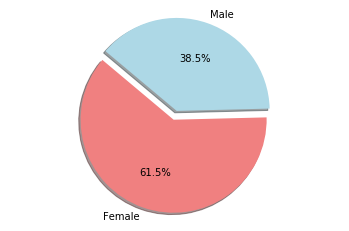

In [162]:
labels = df_twitter.GENDER
sizes = [df_twitter.SESSION]
colors = ['lightcoral', 'lightblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [158]:
df_line

,SERVICE,GENDER,AGE,SESSION
8,LINE,Female,43.349693,3257279
11,LINE,Male,41.318388,2938428


C:\Users\Anuwat\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


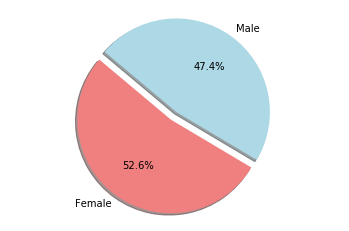

In [163]:
labels = df_line.GENDER
sizes = [df_line.SESSION]
colors = ['lightcoral', 'lightblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [164]:
data

,GENDER,AGE,SERVICE,SESSION
0,Female,48,Google Cloud Messaging,6
1,Female,47,Google,92
2,Male,40,Facebook,537
3,Male,40,Skout,884
4,Male,38,Google,407
...,...,...,...,...
394309,Female,35,Google,57
394310,Male,27,Google,724
394311,Male,49,Google,565
394312,Male,33,Lazada,129


In [216]:
dc = sklearn.dummy.DummyClassifier(strategy='most_frequent')
dc.fit(data[['AGE', 'SERVICE', 'SESSION']], data.GENDER)
dc.predict([[True, 'Twitter', True]])

array(['Male'], dtype='<U4')

In [76]:
# g1.get_group('Facebook')
# data[['SERVICE']].count()
# data_mean = data.groupby('SERVICE').mean()